<a href="https://colab.research.google.com/github/navyasripenmetsa/CSL2050_PRML_Major_Course_Project/blob/Logistic_Regresion/logistic_regression_hog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Training Accuracy: 0.9981
Test Accuracy: 0.7917
Confusion Matrix (Test Set):
[[157   0   0 ...   0   0   0]
 [  0 110   0 ...   0   0   0]
 [  1   0 141 ...   0   0   0]
 ...
 [  0   0   0 ... 135   0   0]
 [  0   0   0 ...   0  80   0]
 [  0   0   0 ...   0   0  80]]
Classification Report (Test Set):
                       precision    recall  f1-score   support

              Apple 6       0.90      1.00      0.95       157
     Apple Braeburn 1       0.67      0.67      0.67       164
 Apple Crimson Snow 1       0.72      0.95      0.82       148
       Apple Golden 1       0.93      0.93      0.93       160
       Apple Golden 2       0.76      0.80      0.78       164
       Apple Golden 3       0.77      0.62      0.69       161
 Apple Granny Smith 1       0.84      0.66      0.74       164
    Apple Pink Lady 1       0.78      0.94      0.85       152
          Apple Red 1       0.43      0.30      0.35       164
          Apple Red 2       0.52      0.69      0.59       164
   

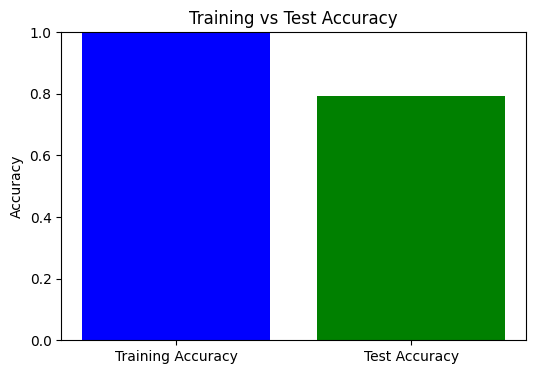

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

# 1. LOAD THE DATASETS
train_data = pd.read_csv("/content/hog_features_train.csv")  # Loading the training dataset from CSV file
test_data = pd.read_csv("/content/fruits_hog_features_test.csv")  # Loading the testing dataset from CSV file

# 2. SEPARATE FEATURES AND LABELS
X_train = train_data.drop(columns=['Class'])  # Extracting all feature columns for training set
y_train = train_data['Class']  # Extracting the class labels for training set
X_test = test_data.drop(columns=['Class'])  # Extracting all feature columns for test set
y_test = test_data['Class']  # Extracting the class labels for test set

# 3. FEATURE SCALING (very important for logistic regression)
scaler = StandardScaler()  # Initializing the StandardScaler to normalize feature values
X_train_scaled = scaler.fit_transform(X_train)  # Fitting scaler on training data and transforming it
X_test_scaled = scaler.transform(X_test)  # Transforming the test data using the fitted scaler


# 4. TRAIN THE LOGISTIC REGRESSION MODEL (with class_weight='balanced')
model = LogisticRegression(max_iter=2000, solver='lbfgs', class_weight='balanced', C=0.1)  # Initializing the Logistic Regression model with 2000 max iterations, using lbfgs solver and balancing class weights
model.fit(X_train_scaled, y_train)  # Training the Logistic Regression model using the scaled training data

# 5. MAKE PREDICTIONS
y_train_pred = model.predict(X_train_scaled)  # Predicting class labels for the training set
y_test_pred = model.predict(X_test_scaled)  # Predicting class labels for the test set

# 6. EVALUATE TRAINING & TEST ACCURACY
train_accuracy = accuracy_score(y_train, y_train_pred)  # Calculating accuracy for training data
test_accuracy = accuracy_score(y_test, y_test_pred)  # Calculating accuracy for test data

print(f"Training Accuracy: {train_accuracy:.4f}")  # Printing the training accuracy rounded to 4 decimal places
print(f"Test Accuracy: {test_accuracy:.4f}")  # Printing the test accuracy rounded to 4 decimal places

print("Confusion Matrix (Test Set):")
print(confusion_matrix(y_test, y_test_pred))  # Printing confusion matrix for the test set

print("Classification Report (Test Set):")
print(classification_report(y_test, y_test_pred))  # Printing classification report for the test set

# 7. VISUALIZE TRAINING & TESTING ACCURACY
plt.figure(figsize=(6, 4))  # Setting the figure size for better visualization
plt.bar(["Training Accuracy", "Test Accuracy"], [train_accuracy, test_accuracy], color=['blue', 'green'])  # Creating a bar chart
plt.ylim(0, 1)  # Setting y-axis limit from 0 to 1 (since accuracy is between 0 and 1)
plt.ylabel("Accuracy")  # Label for y-axis
plt.title("Training vs Test Accuracy")
plt.show()
